# Digit Recognition Notebook 

## Imports

In [3]:
import os.path
import gzip
import numpy as np
import matplotlib.pyplot as plt
import keras as kr
import sklearn.preprocessing as pre
import tensorflow as tf
import tkinter as tk # used to load img
from tkinter import filedialog #for uploading image files
from keras.preprocessing import image

C:\Users\KMora\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading Data

In [4]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f: 
    file_content = f.read() 

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read() 

## Neural network

Now we will create our neural network. We are going to use 4 layers. The first thing we do is tell keras it will be sequential meaning multiply layers. We then use .add() to add each layer. 
The first layer we tell to have 1000 neurons and that the input dimension is 784(which we get from the rows by columns of our data set)
We then tell it to have a dropout of 20% which means when each layer runs it will remove 20% of the neurons from the network. This is to limit the interdependency of each neuron on eachother.(If we leave this out accuracy will go up to 97% on test data but will have difficulty with user input)
We do these two steps for each layer execpt the last to guarantee each neuron is trained at least once. 
We then create a output layer with 10 neurons which is for our ten possiable answers. 
Using optimiser adam as it was named the fastest and most consistent one [here](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2)

In [18]:
from keras.layers import Dense, Dropout, Activation
from keras.models import Model

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784, kernel_initializer="normal"))
model.add(Dropout(0.2)) #Dropout is a technique where randomly selected neurons are ignored during training. 
# They are “dropped-out” randomly. 
# This means that their contribution to the activation of downstream neurons is temporally removed on the 
# forward pass and any weight updates are not applied to the neuron on the backward pass.
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(Dropout(0.2))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(Dropout(0.2))
model.add(kr.layers.Dense(units=1000, activation='relu'))


# Add a 10 neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Now we are going to import the training images. 

In [19]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [20]:
inputs = train_img.reshape(60000, 784)/255

In [21]:
# For encoding categorical variables.
encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


Checks if there is a saved neural network. If there is it will use that if not it will create one. 

In [22]:
if os.path.isfile('savedModel.h5py'): 
    model = kr.models.load_model('savedModel.h5py')
    print("Using precreated neuralNetwork. If you wish to create your own just rename or remove from folder file named savedModel.h5py ")
else:
    model.fit(inputs, outputs, epochs=15, batch_size=100)


Epoch 1/15
60000/60000 [==============================] - 121s 2ms/step - loss: 0.5480 - acc: 0.8220
Epoch 2/15
60000/60000 [==============================] - 118s 2ms/step - loss: 0.3342 - acc: 0.8945
Epoch 3/15
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2826 - acc: 0.9121
Epoch 4/15
60000/60000 [==============================] - 123s 2ms/step - loss: 0.2578 - acc: 0.9203 
Epoch 5/15
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2369 - acc: 0.9275
Epoch 6/15
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2147 - acc: 0.9346 3s - loss: 0.215
Epoch 7/15
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2051 - acc: 0.9371
Epoch 8/15
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2072 - acc: 0.9365
Epoch 9/15
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1988 - acc: 0.9392
Epoch 10/15
60000/60000 [==============================] - 121s 2ms/step 

Now we save our model so we dont have to recreate it everytime. 

In [25]:
# save the current model
kr.models.save_model(
    model,
    "savedModel.h5py",
    overwrite=True,
    include_optimizer=True
)

In [23]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

Now we will test our network against the test images and see how many it can correctly identify.

In [24]:
print("MNIST Test Images correctly identified: ",(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum(),"/10000")

MNIST Test Images correctly identified:  9646 /10000


Now we will imput our own drawn image to testour neural network. When this is run a window will open that will let us select our file. 
When we select our file it will appear drawn in a window. 
Then once we close te window our network will try and determine what our drawn number is. You can use paint or gimp to draw your image. 

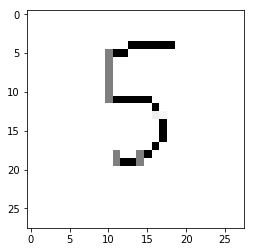

program has predicted :  [5]


In [12]:
root = tk.Tk()
root.withdraw()
#code source https://stackoverflow.com/questions/9319317/quick-and-easy-file-dialog-in-python

file_path = filedialog.askopenfilename()# opens file select window
img = image.load_img(path=file_path,color_mode = "grayscale",target_size=(28,28,1))
#loads image into PIL format
image1 = np.array(list(image.img_to_array(img))).reshape(1, 784).astype(np.uint8) / 255.0
# shapes array 
plt.imshow(img)
plt.show()
test = model.predict(image1)
print("program has predicted : ", test.argmax(axis=1))
#code source https://towardsdatascience.com/basics-of-image-classification-with-keras-43779a299c8b

# References

[Optimizers](https://keras.io/optimizers/)   
[Keras Model](https://keras.io/models/model/)   
[Best Optimizers](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2)   
[Python Machine Learning Tutorial](https://www.python-course.eu/neural_network_mnist.php)   
[How to classify MNIST digits with different neural network architectures](https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3) 

